In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Data/products_4.csv')

In [2]:
df_rs = df[df['Proj_State'] == 'RS']
df_rs.drop(columns=['Prod_Desc', 'Sub_Name', 'ID_Proj', 'Proj_Name', 'Proj_City'], inplace=True)
df_rs.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29576\597132560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rs.drop(columns=['Prod_Desc', 'Sub_Name', 'ID_Proj', 'Proj_Name', 'Proj_City'], inplace=True)


,Cat_Name,BOM_Quant,Proj_State,Proj_Date
5,Construção Civil,10.64,RS,2023-09-06
18,Construção Civil,10.00,RS,2023-09-06
36,Construção Civil,1.00,RS,2023-09-19
37,Construção Civil,1.00,RS,2023-09-19
38,Construção Civil,1.00,RS,2023-09-19


In [3]:
df_rs.isnull().sum()

Cat_Name      0
BOM_Quant     0
Proj_State    0
Proj_Date     0
dtype: int64

### Criando um dataset para cada categoria que sera modelada

In [22]:
df_rs_ferragens = df_rs[df_rs['Cat_Name'] == 'Ferragens']
df_rs_construcao_civil = df_rs[df_rs['Cat_Name'] == 'Construção Civil']
df_rs_materiais_eletricos = df_rs[df_rs['Cat_Name'] == 'Materiais Elétricos']

### Agrupamento e Soma de BOM_Quant por Data

In [23]:
df_rs_ferragens_grouped = df_rs_ferragens.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()
df_rs_construcao_civil_grouped = df_rs_construcao_civil.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()
df_rs_materiais_eletricos_grouped = df_rs_materiais_eletricos.groupby('Proj_Date').agg({'BOM_Quant': 'sum'}).reset_index()

In [24]:
n_duplicates = df_rs_ferragens_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')

n_duplicates = df_rs_construcao_civil_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')

n_duplicates = df_rs_materiais_eletricos_grouped.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')


Número de duplicados: 0
Número de duplicados: 0
Número de duplicados: 0


In [25]:
# Verificando se há valores zero ou negativos
print(df_rs_ferragens_grouped[df_rs_ferragens_grouped['BOM_Quant'] <= 0].shape[0])
print(df_rs_construcao_civil_grouped[df_rs_construcao_civil_grouped['BOM_Quant'] <= 0].shape[0])
print(df_rs_materiais_eletricos_grouped[df_rs_materiais_eletricos_grouped['BOM_Quant'] <= 0].shape[0])


0
0
0


In [26]:
df_rs_ferragens_grouped.to_csv('../Data/PreparedData/RS/RS_FERRAGENS.csv', index=False)
df_rs_construcao_civil_grouped.to_csv('../Data/PreparedData/RS/RS_CONSTRUCAO_CIVIL.csv', index=False)
df_rs_materiais_eletricos_grouped.to_csv('../Data/PreparedData/RS/RS_MATERIAIS_ELETRICOS.csv', index=False)

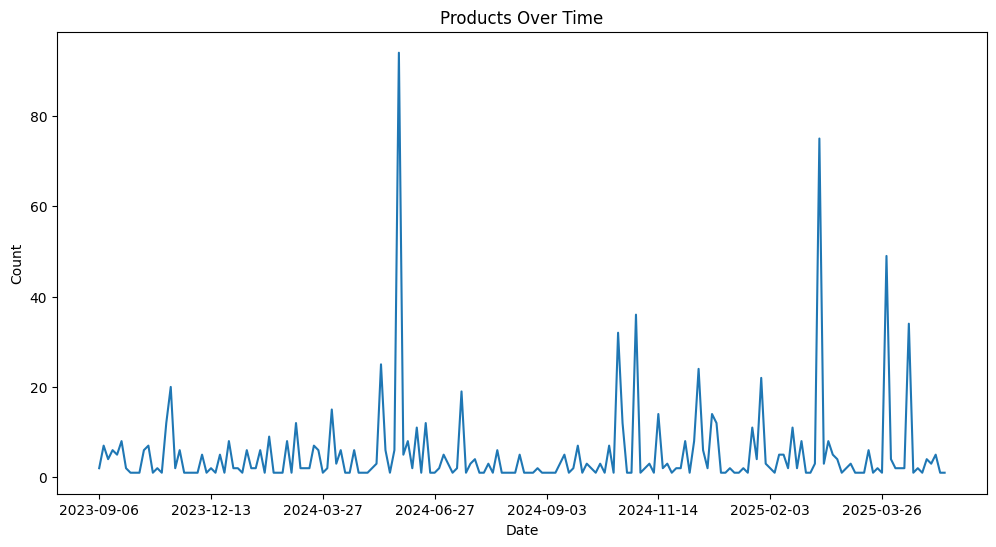

In [27]:
plt.figure(figsize=(12, 6))
df_rs.groupby('Proj_Date').size().plot()
plt.title('Products Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### Criando datasets semanais

In [28]:
df_rs_ferragens_grouped['Proj_Date'] = pd.to_datetime(df_rs_ferragens_grouped['Proj_Date'])  
df_rs_construcao_civil_grouped['Proj_Date'] = pd.to_datetime(df_rs_construcao_civil_grouped['Proj_Date'])  
df_rs_materiais_eletricos_grouped['Proj_Date'] = pd.to_datetime(df_rs_materiais_eletricos_grouped['Proj_Date'])  
  
df_rs_ferragens_grouped.set_index('Proj_Date', inplace=True)  
df_rs_construcao_civil_grouped.set_index('Proj_Date', inplace=True)  
df_rs_materiais_eletricos_grouped.set_index('Proj_Date', inplace=True) 

In [29]:
df_rs_ferragens_semanal = df_rs_ferragens_grouped.resample('W').sum().reset_index()  
df_rs_construcao_civil_semanal = df_rs_construcao_civil_grouped.resample('W').sum().reset_index()  
df_rs_materiais_eletricos_semanal = df_rs_materiais_eletricos_grouped.resample('W').sum().reset_index() 


df_rs_ferragens_semanal.to_csv('../Data/PreparedData/RS/Semanal/RS_FERRAGENS.csv', index=False)
df_rs_construcao_civil_semanal.to_csv('../Data/PreparedData/RS/Semanal/RS_CONSTRUCAO_CIVIL.csv', index=False)
df_rs_materiais_eletricos_semanal.to_csv('../Data/PreparedData/RS/Semanal/RS_MATERIAIS_ELETRICOS.csv', index=False)

### Criando datasets quinzenais

In [30]:
df_rs_ferragens_quinzenal = df_rs_ferragens_grouped.resample('15D').sum().reset_index()  
df_rs_construcao_civil_quinzenal = df_rs_construcao_civil_grouped.resample('15D').sum().reset_index()  
df_rs_materiais_eletricos_quinzenal = df_rs_materiais_eletricos_grouped.resample('15D').sum().reset_index()  

df_rs_ferragens_quinzenal.to_csv('../Data/PreparedData/RS/Quinzenal/RS_FERRAGENS.csv', index=False)
df_rs_construcao_civil_quinzenal.to_csv('../Data/PreparedData/RS/Quinzenal/RS_CONSTRUCAO_CIVIL.csv', index=False)
df_rs_materiais_eletricos_quinzenal.to_csv('../Data/PreparedData/RS/Quinzenal/RS_MATERIAIS_ELETRICOS.csv', index=False)